<a href="https://colab.research.google.com/github/greedyfox7/Mask_RCNN/blob/master/copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

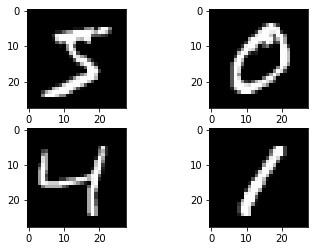

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

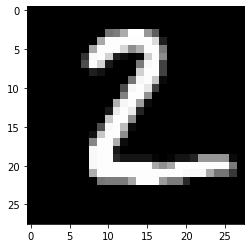

In [ ]:
plt.subplot(111)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_trainc = np_utils.to_categorical(y_train)
y_testc = np_utils.to_categorical(y_test)
num_classes = y_testc.shape[1]

In [ ]:
# define baseline model
def baseline_model(numn,optimizer_i):
    model = Sequential()
    model.add(Dense(numn, input_dim=num_pixels, activation='relu'))
    #model.add(Dense(200, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_i, metrics=['accuracy'])
    return model

In [ ]:
# build the model
optimizer_perebor = ['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl']
for i in range(len(optimizer_perebor))
  print('Output for optimizer: ', optimizer_perebor[i])
  model = baseline_model(160, optimizer_perebor[i])
  # Fit the model
  model.fit(X_train, y_trainc, validation_data=(X_test, y_testc), epochs=10, batch_size=200, verbose=2)
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_testc, verbose=0)
  print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 1s - loss: 0.3931 - accuracy: 0.8913 - val_loss: 0.2085 - val_accuracy: 0.9427
Epoch 2/10
300/300 - 1s - loss: 0.1795 - accuracy: 0.9481 - val_loss: 0.1458 - val_accuracy: 0.9570
Epoch 3/10
300/300 - 1s - loss: 0.1290 - accuracy: 0.9635 - val_loss: 0.1207 - val_accuracy: 0.9647
Epoch 4/10
300/300 - 1s - loss: 0.0999 - accuracy: 0.9714 - val_loss: 0.1006 - val_accuracy: 0.9698
Epoch 5/10
300/300 - 1s - loss: 0.0814 - accuracy: 0.9768 - val_loss: 0.0915 - val_accuracy: 0.9714
Epoch 6/10
300/300 - 1s - loss: 0.0667 - accuracy: 0.9812 - val_loss: 0.0869 - val_accuracy: 0.9731
Epoch 7/10
300/300 - 1s - loss: 0.0560 - accuracy: 0.9846 - val_loss: 0.0812 - val_accuracy: 0.9738
Epoch 8/10
300/300 - 1s - loss: 0.0477 - accuracy: 0.9864 - val_loss: 0.0754 - val_accuracy: 0.9773
Epoch 9/10
300/300 - 1s - loss: 0.0398 - accuracy: 0.9894 - val_loss: 0.0715 - val_accuracy: 0.9775
Epoch 10/10
300/300 - 1s - loss: 0.0343 - accuracy: 0.9908 - val_loss: 0.0716 - val_accuracy: 0.9767

In [ ]:
predicted_results = model.predict(X_test[1].reshape((1, -1)))
print(predicted_results)

[[1.0478869e-07 7.0301971e-06 7.9928459e-06 2.5981797e-02 1.3966976e-06
  1.8851840e-07 1.1256801e-10 1.2684508e-03 9.6123177e-01 1.1501245e-02]]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
predicted_outputs = np.argmax(model.predict(X_test), axis=1)
expected_outputs = np.argmax(y_testc, axis=1)

predicted_confusion_matrix = confusion_matrix(expected_outputs, predicted_outputs)
predicted_confusion_matrix

array([[684,   0,   0,   2,   0,   1,   2,   1,   0,   0],
       [  1, 779,   4,   0,   1,   0,   1,   0,   1,   0],
       [  2,   2, 678,   5,   2,   0,   1,   6,   2,   1],
       [  0,   2,   5, 679,   0,   7,   1,   8,   7,   5],
       [  1,   0,   1,   1, 656,   2,   1,   2,   3,  16],
       [  2,   1,   1,   5,   1, 610,   5,   0,   5,   1],
       [  2,   3,   0,   0,   3,   1, 677,   0,   2,   0],
       [  0,   9,   2,   0,   2,   1,   0, 712,   1,   2],
       [  3,  11,   2,  10,   1,   3,   1,   3, 645,   4],
       [  2,   2,   0,   2,   6,   4,   0,   8,   0, 672]])

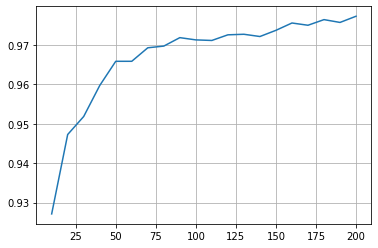

In [ ]:
import matplotlib.pyplot as plt
mist1=np.array(mist).T.tolist()
graph1 = plt.plot(mist1[0],mist1[1])
plt.grid()
plt.show()
